In [73]:
import torch
from tank_royal_manager.robocode_event_models import ScannedBotEvent
import numpy as np
import cv2 as cv
import torch as t
from torchvision.transforms import ToPILImage
import torchvision.transforms as transforms
from matplotlib import pyplot as plt

to_img = ToPILImage()

basic_scanned_bot_event = ScannedBotEvent(
        scannedBotId = 2,
        scannedByBotId = 1,
        energy=2.8,
        x=473,
        y=241,
        direction=270,
        speed=1)
width = 800
height = 600

In [74]:
img_shape = (height,width,3)
tank_bounding_radius = 18 # From rules.kt
color = (0,255,0)
thickness = 2
start_point = (int(basic_scanned_bot_event.x), int(basic_scanned_bot_event.y))

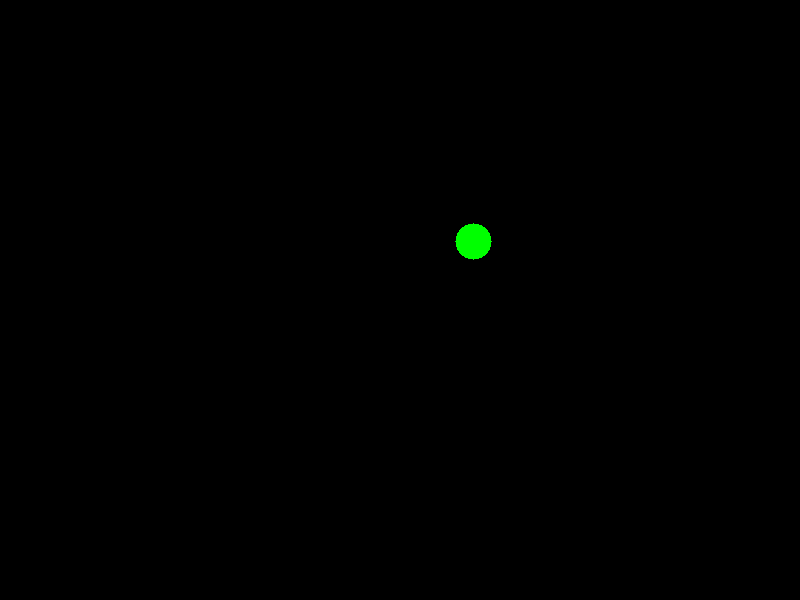

In [75]:
img = np.zeros(img_shape, np.uint8)
cv.circle(img, start_point, tank_bounding_radius, (0,255,0),-1)
#image = cv.rectangle(img, start_point, end_point, color, thickness)
transform = transforms.ToTensor()
tensor = transform(img)
to_img(tensor)

In [97]:
from tank_royal_manager.robocode_event_models import TickEventForBot
import json

full_tick_event = '{"type": "TickEventForBot", "roundNumber": 1, "enemyCount": 1, "botState": {"energy": 100.0, "x": 463.4280497345315, "y": 164.47427615434802, "direction": 348.51705055620755, "gunDirection": 348.51705055620755, "radarDirection": 213.51705055620755, "radarSweep": 45.0, "speed": 1.0, "turnRate": 0.0, "gunTurnRate": 0.0, "radarTurnRate": 45.0, "gunHeat": 0.0, "bodyColor": null, "turretColor": null, "radarColor": null, "bulletColor": null, "scanColor": null, "tracksColor": null, "gunColor": null}, "bulletStates": [{"bulletId": 1, "ownerId": 2, "power": 1.0, "x": 107.69258876807527, "y": 126.57878303697831, "direction": 180.24192112119894, "color": null}], "events": [{"scannedByBotId": 1, "scannedBotId": 2, "energy": 99.0, "x": 124.69243723041103, "y": 126.65056226531365, "direction": 180.24192112119894, "speed": 0.0, "turnNumber": 39, "type": "ScannedBotEvent"}]}'
tick_dict = json.loads(full_tick_event)
tick_event = TickEventForBot(**tick_dict)


In [98]:
bullet_state_event = '{"bulletId": 1, "ownerId": 2, "power": 1.0, "x": 107.69258876807527, "y": 126.57878303697831, "direction": 180.24192112119894, "color": null}'
self_state_event = '{"energy": 100.0, "x": 463.4280497345315, "y": 164.47427615434802, "direction": 348.51705055620755, "gunDirection": 348.51705055620755, "radarDirection": 213.51705055620755, "radarSweep": 45.0, "speed": 1.0, "turnRate": 0.0, "gunTurnRate": 0.0, "radarTurnRate": 45.0, "gunHeat": 0.0, "bodyColor": null, "turretColor": null, "radarColor": null, "bulletColor": null, "scanColor": null, "tracksColor": null, "gunColor": null}'

In [99]:
from tank_royal_manager.robocode_event_models import BulletState

def draw_scanned_bot(img, event: ScannedBotEvent):
        print(event)
        tank_bounding_radius = 18
        color = (255,0,0)
        cv.circle(img,(int(event.x), int(event.y)),tank_bounding_radius,color,-1)
def draw_scanned_bullet(img, event: BulletState):
        print(event)
        bullet_bounding_radius=5
        color = (0,0,255)
        cv.circle(img,(int(event.x), int(event.y)),bullet_bounding_radius,color,-1)
def draw_tick(tick_event: TickEventForBot):
        img = np.zeros(img_shape, np.uint8)
        for event in tick_event.events:
                if event['type'] == "ScannedBotEvent":
                        draw_scanned_bot(img,ScannedBotEvent(**event))
        for bullet in tick_event.bulletStates:
                print(bullet)
                draw_scanned_bullet(img, bullet)
        return img

type=<MessageType.ScannedBotEvent: 'ScannedBotEvent'> scannedByBotId=1 scannedBotId=2 energy=99.0 x=124.69243723041103 y=126.65056226531365 direction=180.24192112119894 speed=0.0
bulletId=1 ownerId=2 power=1.0 x=107.69258876807527 y=126.57878303697831 direction=180.24192112119894 color=None
bulletId=1 ownerId=2 power=1.0 x=107.69258876807527 y=126.57878303697831 direction=180.24192112119894 color=None


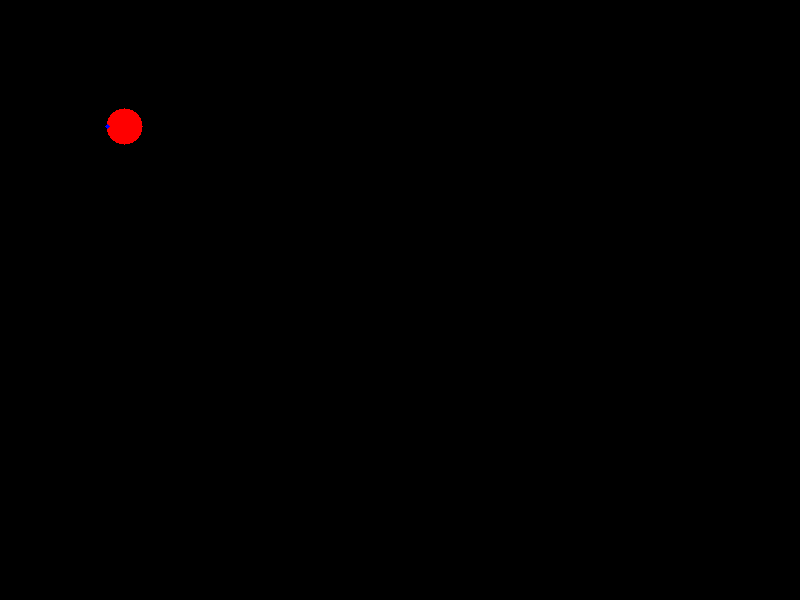

In [100]:
img = draw_tick(tick_event)
transform = transforms.ToTensor()
tensor = transform(img)
to_img(tensor)